In [905]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/train_finance.csv'
path_test=working_directory+'/test_finance.csv'
# path_test=working_directory+'/test_finance_last10elminate.csv'
path_latest=working_directory+'/test_latest.csv'
path_submit=working_directory+'/submit_finance.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_latest=pd.read_csv(path_latest)
df_submit=pd.read_csv(path_submit)

In [906]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')
df_latest['Date']=pd.to_datetime(df_latest['Date'],format='%Y/%m/%d')

In [907]:
#データの確認
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.910559,123.526205,123.529490
std,9.210193,9.493319,9.188003,9.184970
min,108.520946,6.743457,107.993884,107.998923
25%,117.002707,115.863246,116.408944,116.427990
50%,123.242134,121.951219,122.590435,122.573382
75%,130.814157,129.393252,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


### Train異常値処理

In [908]:
# Trainデータ異常値
df_train[(df_train['Low']<10)]
no=df_train[(df_train['Low']<10)].index
# print(f'欠損データ確認(df_train)\n{typeInfo(no)}\n')

In [909]:
# df_train.iloc[no:no+1] #インデックス指定されてるものでないとilocの範囲指定に使えない
print(f'異常値▲1日\n{df_train.iloc[no-1]}\n')
print(f'異常値当日\n{df_train.iloc[no]}\n')
print(f'異常値+1日\n{df_train.iloc[no+1]}\n')

異常値▲1日
           Date        High         Low        Open       Close
1114 2008-03-14  145.059359  143.736202  144.513188  144.465784

異常値当日
           Date        High       Low        Open       Close
1115 2008-03-17  147.103265  6.743457  145.669288  145.669288

異常値+1日
           Date        High         Low        Open      Close
1116 2008-03-18  146.409411  144.456764  145.660125  144.83676



In [910]:
ave =(df_train['Low'][1114]+df_train['Low'][1116]) /2
ave

144.09648299217224

In [911]:
df_train['Low'][1115]=ave
df_train['Low'][1115]

144.09648299217224

In [912]:
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.976785,123.526205,123.529490
std,9.210193,9.155624,9.188003,9.184970
min,108.520946,107.748581,107.993884,107.998923
25%,117.002707,115.876669,116.408944,116.427990
50%,123.242134,121.954434,122.590435,122.573382
75%,130.814157,129.426294,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


In [913]:
#データの確認
df_test.describe()

,High,Low,Open,Close
count,1246.000000,1246.000000,1246.000000,1246.000000
mean,111.424603,110.675657,111.069958,111.070373
std,9.206534,9.270658,9.215541,9.214999
min,96.767439,70.352906,96.364197,96.357173
25%,103.722807,103.064503,103.422443,103.422154
50%,108.456692,107.796669,108.091687,108.082215
75%,120.690221,119.751722,120.218867,120.219641
max,129.417693,128.691531,128.851618,128.858797


## 単純移動平均の追加

In [914]:
#　移動平均の期間
span01=6
# span02=6
# span03=12

In [915]:
df_train['SMA01']=df_train['Close'].rolling(window=span01).mean()
df_test['SMA01']=df_test['Close'].rolling(window=span01).mean()

# df_train['SMA02']=df_train['Close'].rolling(window=span01).mean()
# df_test['SMA02']=df_test['Close'].rolling(window=span01).mean()

# df_train['SMA03']=df_train['Close'].rolling(window=span01).mean()
# df_test['SMA03']=df_test['Close'].rolling(window=span01).mean()

In [916]:
# 
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01
0    2003-12-01  111.370639  110.482062  111.314347  110.676377         NaN
1    2003-12-02  112.008532  110.500532  110.639316  111.823016         NaN
2    2003-12-03  112.202814  111.712284  111.832477  112.137524         NaN
3    2003-12-04  112.332259  111.406851  112.110343  111.748717         NaN
4    2003-12-05  112.766375  111.609834  111.721723  112.729259         NaN
...         ...         ...         ...         ...         ...         ...
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395

[2074 rows x 6 columns]

test
           Date        High         Low        Open

In [917]:
# 移動平均1日目を取り合えす終値で埋める
df_train['SMA01'][0]=df_train['Close'][0]
df_test['SMA01'][0]=df_test['Close'][0]

# df_train['SMA02'][0]=df_train['Close'][0]
# df_test['SMA02'][0]=df_test['Close'][0]

# df_train['SMA03'][0]=df_train['Close'][0]
# df_test['SMA03'][0]=df_test['Close'][0]

In [918]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377
1    2003-12-02  112.008532  110.500532  110.639316  111.823016         NaN
2    2003-12-03  112.202814  111.712284  111.832477  112.137524         NaN
3    2003-12-04  112.332259  111.406851  112.110343  111.748717         NaN
4    2003-12-05  112.766375  111.609834  111.721723  112.729259         NaN
...         ...         ...         ...         ...         ...         ...
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395

[2074 rows x 6 columns]

test
           Date        High         Low        Open

In [919]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [920]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377
1    2003-12-02  112.008532  110.500532  110.639316  111.823016  110.946101
2    2003-12-03  112.202814  111.712284  111.832477  112.137524  111.215825
3    2003-12-04  112.332259  111.406851  112.110343  111.748717  111.485549
4    2003-12-05  112.766375  111.609834  111.721723  112.729259  111.755273
...         ...         ...         ...         ...         ...         ...
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395

[2074 rows x 6 columns]

test
           Date        High         Low        Open

## ボリンジャーバンド

In [921]:
df_train['mean'] = df_train['Close'].rolling(window=span01).mean()
df_train['std'] = df_train['Close'].rolling(window=span01).std()
df_train['upper'] = df_train['mean'] + (df_train['std'] * 2)
df_train['lower'] = df_train['mean'] - (df_train['std'] * 2)

df_test['mean'] = df_test['Close'].rolling(window=span01).mean()
df_test['std'] = df_test['Close'].rolling(window=span01).std()
df_test['upper'] = df_test['mean'] + (df_test['std'] * 2)
df_test['lower'] = df_test['mean'] - (df_test['std'] * 2)

In [922]:
# bband = pd.DataFrame()
# bband['Close'] = df_train['Close']
# bband['mean'] = df_train['Close'].rolling(window=span01).mean()
# bband['std'] = df_train['Close'].rolling(window=span01).std()
# bband['upper'] = bband['mean'] + (bband['std'] * 2)
# bband['lower'] = bband['mean'] - (bband['std'] * 2)

In [923]:
df_train[18:25]

,Date,High,Low,Open,Close,SMA01,mean,std,upper,lower
18,2003-12-25,115.348160,115.098423,115.227460,115.144273,114.866415,114.866415,0.259252,115.384918,114.347912
19,2003-12-26,115.356794,114.949671,115.162908,114.995399,114.880224,114.880224,0.264356,115.408937,114.351511
20,2003-12-29,115.698759,114.976819,115.013991,115.476325,115.032777,115.032777,0.304376,115.641529,114.424024
21,2003-12-30,116.207494,115.467680,115.495071,116.077697,115.264014,115.264014,0.472642,116.209297,114.318730
22,2003-12-31,117.002707,115.903164,116.087908,116.457671,115.556920,115.556920,0.584663,116.726247,114.387594
23,2004-01-01,116.623592,115.384129,116.457671,116.382942,115.755718,115.755718,0.635583,117.026884,114.484552
24,2004-01-02,116.809152,115.874130,116.382942,116.382942,115.962163,115.962163,0.597270,117.156703,114.767623


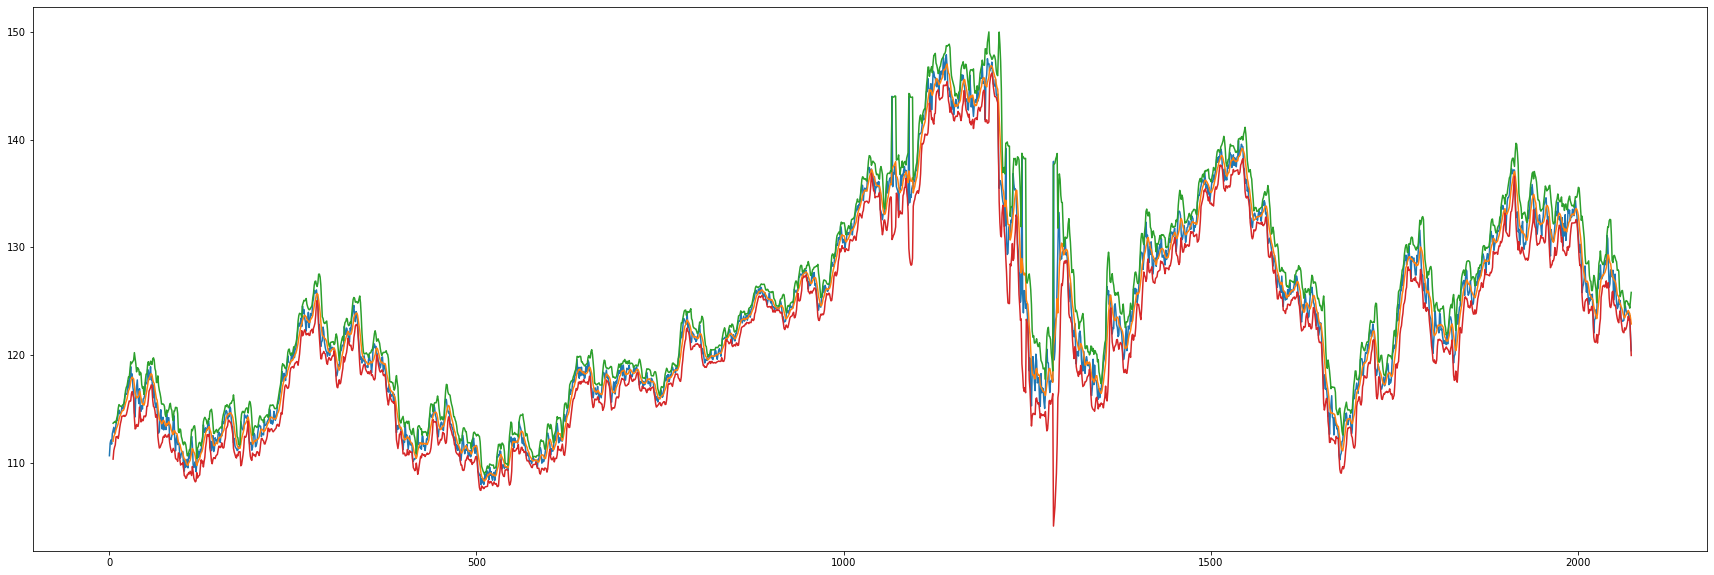

In [924]:
bband=df_train
drop = ['Date', 'High','Low', 'Open', 'SMA01', 'std',]
bband = df_train.drop(columns=drop,axis=1) 

fig = plt.subplots(figsize=(30,10))
# plt.title('Bollinger Band')
# plt.ylabel('USD/JPY')
plt.plot(bband)
# plt.legend()

In [925]:
df_train

,Date,High,Low,Open,Close,SMA01,mean,std,upper,lower
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,110.676377,NaN,NaN,NaN,NaN
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,110.946101,NaN,NaN,NaN,NaN
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,111.215825,NaN,NaN,NaN,NaN
3,2003-12-04,112.332259,111.406851,112.110343,111.748717,111.485549,NaN,NaN,NaN,NaN
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,111.755273,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2069,2011-12-08,124.476855,123.126484,123.959751,123.984661,124.154053,124.154053,0.267667,124.689388,123.618718
2070,2011-12-09,124.227770,122.895824,123.445260,123.445260,124.002202,124.002202,0.369144,124.740490,123.263915
2071,2011-12-12,123.745819,122.202555,123.681290,123.687906,123.855345,123.855345,0.256670,124.368685,123.342005
2072,2011-12-13,122.393352,121.174807,121.782641,121.832361,123.473057,123.473057,0.833270,125.139596,121.806517


In [926]:
# mean/std削除＋1日目を取り合えす終値で埋める
drop = ['mean', 'std',]
df_train = df_train.drop(columns=drop,axis=1) 
df_train['lower'][0]=df_train['Close'][0]
df_train['upper'][0]=df_train['Close'][0]

df_test = df_test.drop(columns=drop,axis=1) 
df_test['lower'][0]=df_test['Close'][0]
df_test['upper'][0]=df_test['Close'][0]

In [927]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [928]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016  110.946101   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524  111.215825   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717  111.485549   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259  111.755273   
...         ...         ...         ...         ...         ...         ...   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057   
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395   

           upper       lower  
0     110.6763

## 指数移動平滑平均(EMA)の追加

In [929]:
# # EMA関数
# def EMA(df,span):
#     df["EMA"] = df["Close"].ewm(span=span).mean()
#     return df

In [930]:
# EMAを計算する
# df_train = EMA(df_train,span01)
# df_test = EMA(df_test,span01)

In [931]:
df_train['EMA01']=df_train['Close'].ewm(span=span01, adjust=False).mean()
df_test['EMA01']=df_test['Close'].ewm(span=span01, adjust=False).mean()

# df_train['EMA02']=df_train['Close'].ewm(span=span02, adjust=False).mean()
# df_test['EMA02']=df_test['Close'].ewm(span=span02, adjust=False).mean()

# df_train['EMA03']=df_train['Close'].ewm(span=span03, adjust=False).mean()
# df_test['EMA03']=df_test['Close'].ewm(span=span03, adjust=False).mean()

In [932]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016  110.946101   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524  111.215825   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717  111.485549   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259  111.755273   
...         ...         ...         ...         ...         ...         ...   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057   
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395   

           upper       lower       EMA01  
0 

##　ピボットポイント

In [933]:
## PPをShiftしてるが使い方合ってるか不明
df_train['PP'] = ((df_train['High'].shift(1) + df_train['Low'].shift(1) + df_train['Close'].shift(1)) / 3)
df_train['R1'] = (2 * df_train['PP'] - df_train['Low'])
df_train['S1'] = (2 * df_train['PP'] - df_train['High'])
df_train['R2'] = (df_train['PP'] + df_train['High'] - df_train['Low'])
df_train['S2'] = (df_train['PP'] - df_train['High'] + df_train['Low'])
df_train['R3'] = (df_train['High'] + 2 * (df_train['PP'] -df_train['Low']))
df_train['S3'] = (df_train['Low'] - 2 * (df_train['High'] - df_train['PP']))

## PPをShiftしてるが使い方合ってるか不明
df_test['PP'] = ((df_test['High'].shift(1) + df_test['Low'].shift(1) + df_test['Close'].shift(1)) / 3)
df_test['R1'] = (2 * df_test['PP'] - df_test['Low'])
df_test['S1'] = (2 * df_test['PP'] - df_test['High'])
df_test['R2'] = (df_test['PP'] + df_test['High'] - df_test['Low'])
df_test['S2'] = (df_test['PP'] - df_train['High'] + df_test['Low'])
df_test['R3'] = (df_test['High'] + 2 * (df_test['PP'] -df_test['Low']))
df_test['S3'] = (df_test['Low'] - 2 * (df_test['High'] - df_test['PP']))

In [934]:
# df_train['Close'].shift(1)

In [935]:
# 1日目を取り合えす終値で埋める
df_train['PP'][0]=df_train['Close'][0]
df_train['R1'][0]=df_train['Close'][0]
df_train['S1'][0]=df_train['Close'][0]
df_train['R2'][0]=df_train['Close'][0]
df_train['S2'][0]=df_train['Close'][0]
df_train['R3'][0]=df_train['Close'][0]
df_train['S3'][0]=df_train['Close'][0]


df_test['PP'][0]=df_test['Close'][0]
df_test['R1'][0]=df_test['Close'][0]
df_test['S1'][0]=df_test['Close'][0]
df_test['R2'][0]=df_test['Close'][0]
df_test['S2'][0]=df_test['Close'][0]
df_test['R3'][0]=df_test['Close'][0]
df_test['S3'][0]=df_test['Close'][0]

In [936]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [937]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016  110.946101   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524  111.215825   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717  111.485549   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259  111.755273   
...         ...         ...         ...         ...         ...         ...   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057   
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395   

           upper       lower       EMA01     

## RSIの追加

In [938]:
# # RSI関数
# def RSI(df,span):
#     #　終値の差分
#     df_diff=df.diff()
    
#     # 値上幅と値下幅
#     df_up, df_down = df_diff.copy(), df_diff.copy()
#     df_up[df_up < 0] = 0
#     df_down[df_down > 0] = 0
#     df_down = df_down * -1
    
#     # 移動平均
#     up_sma_01 = df_up.rolling(window=span01, center=False).mean()
#     down_sma_01 = df_down.abs().rolling(window=span01, center=False).mean()

#     # RSI
#     df = up_sma_01 / (up_sma_01 + down_sma_01) * 100

#     return df

In [939]:
# df_train['RSI01']=RSI(df_train['Close'],span01)
# df_test['RSI01']=RSI(df_test['Close'],span01)

In [940]:
# df_train.to_csv('IdoHeikin.csv')

In [941]:
# # 結果
# print(f'train\n{df_train}\n')
# print(f'test\n{df_test}\n')

In [942]:
# #ブランクは取り敢えず50で埋める
# df_train['RSI01']=df_train['RSI01'].fillna(50)
# df_test['RSI01']=df_test['RSI01'].fillna(50)

In [943]:
# # 最初の行除外
# df_train=df_train[span01:]

In [944]:
# # 結果
# print(f'train\n{df_train}\n')
# print(f'test\n{df_test}\n')

In [945]:
#  df_train.to_csv('IdoHeikin.csv')

In [946]:
# del df_train['RSI01']
# del df_test['RSI01']

## MACEの追加

In [947]:
# # MACE関数
# def macd(df):
#     FastEMA_period = 12  # 短期EMAの期間
#     SlowEMA_period = 26  # 長期EMAの期間
# #     SignalSMA_period = 9  # SMAを取る期間
#     SignalSMA_period = span01  # SMAを取る期間
    
#     df["MACD"] = df["Close"].ewm(span=FastEMA_period).mean() - df["Close"].ewm(span=SlowEMA_period).mean()
#     df["Signal"] = df["MACD"].rolling(SignalSMA_period).mean()
#     return df

In [948]:
# # MACDを計算する
# df_train = macd(df_train)
# df_test = macd(df_test)

In [949]:
# df_train.head(20)

In [950]:
# df_test

In [951]:
# import mpl_finance as mpf
# # import mplfinance as mpf
# # import matplotlib.finance
# # from matplotlib.finance import candlestick_ohlc
 
# # チャート定義
# fig, ax = plt.subplots(2, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
 
# # ローソク足チャートをプロット
# mpl_finance.candlestick_ohlc(ax[0], df.values, width=0.5, colorup='r', colordown='b')
 
# # MACDをプロット
# ax[1].plot(df_train["index"], df_train["MACD"], label="MACD")
# ax[1].plot(df_train["index"], df_train["Signal"], label="Signal")
 
# # X軸を調整
# plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
# fig.autofmt_xdate()
 
# # 凡例表示, グリッド表示
# for a in ax:
#     a.legend()
#     a.grid()
 
# # グラフを表示
# plt.show()

In [952]:
# df_train=df_train[span01-1:]
# df_train

## 多項式特徴量/多項式回帰/交互作用特徴量

In [953]:
# EMAに多項式特徴量を適用してみる
# df_train["EMA"] = df_train["EMA"] **2
# df_test["EMA"] = df_test["EMA"] **2

##　配列の型などを調べるための関数

In [954]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

## Trainデータを学習用と検証用に分割
#### (train:2003/12/1-2011/12/14 →これを8:2に分割する| test:2011/12/15-2019/12/31)

In [955]:
# 不要
# Trainデータを学習用と検証用に分割
# 今回は①学習用：8割、②検証用：2割にTrainデータを分割して、①の予測モデルで
# ②が正しく評価できるのかを確認した上で、testデータへの予測モデルの適用を行う

In [956]:
# 不要
# train_test_splitというDataFrameを分けてくれる関数がsklearnにあるのでそれを使う
# from sklearn.model_selection import train_test_split

# df_train, df_validation = train_test_split(df_train, train_size=0.8, test_size=0.2, shuffle=False)

In [957]:
# 不要
# # 分割後のサイズ
# print(f'①学習用データのサイズ(df_train)：{len(df_train)}')
# print(f'②検証用データのサイズ(df_validation)：{len(df_validation)}')
# print(f'元々のdf_trainのサイズが8:2に分割された\n')

# # 分割後の詳細
# print(f'分割後のサマリ(df_train)\n{df_train.describe()}\n')
# print(f'分割後のサマリ(df_validation)\n{df_validation.describe()}\n')

## *Train/test/latestデータの縦結合(直接今回の課題とは関係なし)

In [958]:
# df_Merged=pd.concat([df_train,df_test,df_latest])
df_Merged = pd.DataFrame(np.concatenate([df_train.values, df_test.values, df_latest.values]), columns=df_train.columns)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16 and the array at index 2 has size 5

In [959]:
df_Merged

NameError: name 'df_Merged' is not defined

In [960]:
df_Merged.info()

NameError: name 'df_Merged' is not defined

##　LSTMモデルへ訓練させるための前処理

In [961]:
##　LSTMモデルへ訓練させるための前処理

In [962]:
# windowを設定
window_len=6
# window_len=6 #11/6の中間報告でのアドバイスを受け修正しようとしたが、後に出てくる未来予測のところでエラーが出るため一旦保留

In [963]:
# # Closeの単価だけ抽出
# df_train=df_train['Close']
# df_test=df_test['Close']
# df_latest=df_latest['Close']

In [964]:
# Dateそぎ落とし
# del df_train['High','Low','Open','Close']
# del df_test['High','Low','Open','Close']
# del df_latest['Date']

In [965]:
# Dateをインデックスに指定
df_train.set_index('Date',inplace=True)
df_test.set_index('Date',inplace=True)
df_latest.set_index('Date',inplace=True)

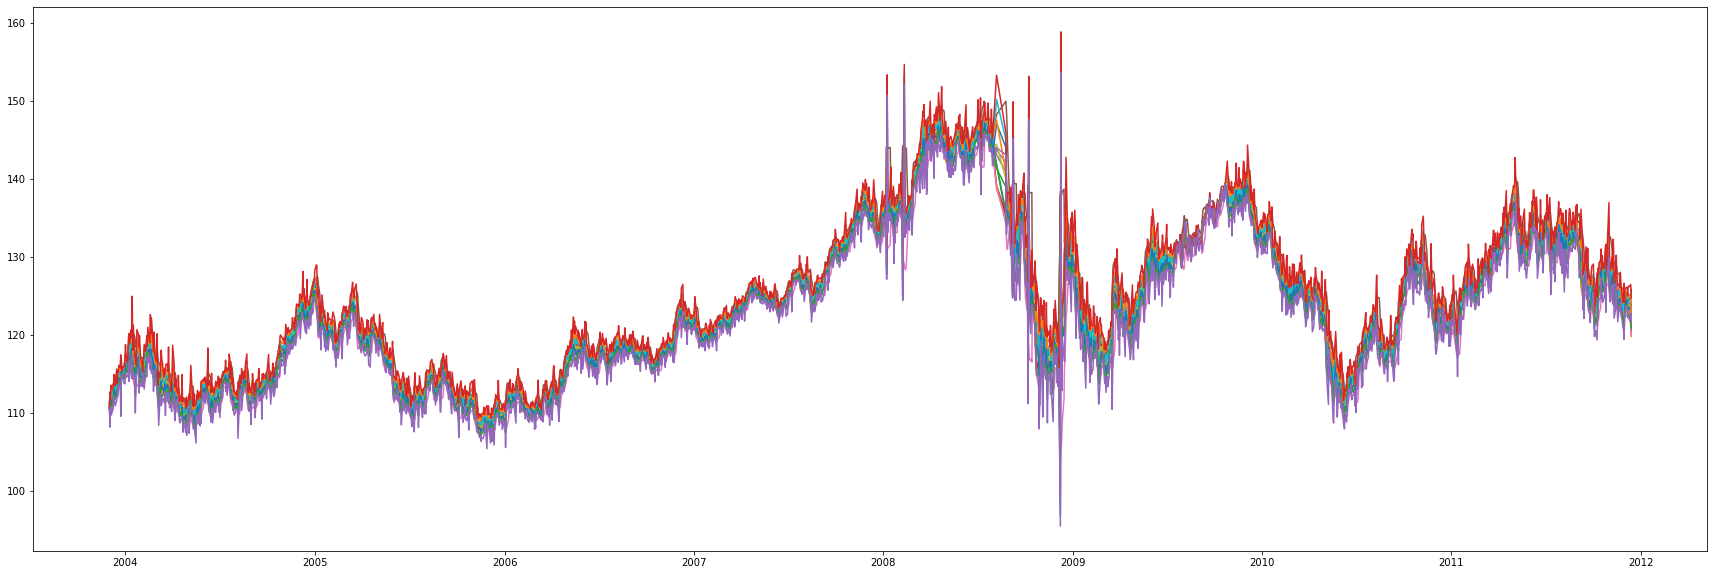

In [966]:
fig = plt.subplots(figsize=(30,10))
plt.plot(df_train)

In [967]:
# 分割後の詳細
print(f'単価抽出後のサマリ(df_train)\n{df_train.describe()}\n')
print(f'単価抽出後のサマリ(df_test)\n{df_test.describe()}\n')
# print(f'単価抽出後のサマリ(df_latest)\n{df_latest.describe()}\n')

単価抽出後のサマリ(df_train)
              High          Low         Open        Close        SMA01  \
count  2074.000000  2074.000000  2074.000000  2074.000000  2074.000000   
mean    124.078238   122.976785   123.526205   123.529490   123.515970   
std       9.210193     9.155624     9.188003     9.184970     9.141672   
min     108.520946   107.748581   107.993884   107.998923   108.316820   
25%     117.002707   115.876669   116.408944   116.427990   116.564712   
50%     123.242134   121.954434   122.590435   122.573382   122.595971   
75%     130.814157   129.426294   130.201913   130.179930   130.032894   
max     148.260942   146.834717   147.832063   147.888796   147.025652   

             upper        lower        EMA01           PP           R1  \
count  2074.000000  2074.000000  2074.000000  2074.000000  2074.000000   
mean    125.192990   121.838949   123.515317   123.523507   124.070135   
std       9.482563     9.000863     9.124043     9.181814     9.343835   
min     108.91054

In [968]:
df_train.head()

,High,Low,Open,Close,SMA01,upper,lower,EMA01,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
2003-12-01,111.370639,110.482062,111.314347,110.676377,110.676377,110.676377,110.676377,110.676377,110.676377,110.676377,110.676377,110.676377,110.676377,110.676377,110.676377
2003-12-02,112.008532,110.500532,110.639316,111.823016,110.946101,111.279080,110.613123,111.003988,110.843026,111.185520,109.677520,112.351026,109.335026,112.693520,108.169520
2003-12-03,112.202814,111.712284,111.832477,112.137524,111.215825,111.881782,110.549868,111.327856,111.444027,111.175769,110.685239,111.934556,110.953497,111.666299,110.194709
2003-12-04,112.332259,111.406851,112.110343,111.748717,111.485549,112.484485,110.486613,111.448102,112.017541,112.628230,111.702823,112.942948,111.092134,113.553638,110.777416
2003-12-05,112.766375,111.609834,111.721723,112.729259,111.755273,113.087187,110.423359,111.814147,111.829276,112.048718,110.892176,112.985817,110.672735,113.205259,109.735635


In [969]:
# LSTMへの入力用に処理の関数

def data_maker(data):
  data_lstm_in=[]
  if len(data)==window_len:
    temp = data[:window_len].copy()
    temp = temp / temp.iloc[0] - 1
    data_lstm_in.append(temp)
  for i in range(len(data) - window_len): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
      temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
      temp = temp / temp.iloc[0] - 1
      data_lstm_in.append(temp)
  return data_lstm_in

In [970]:
#関数の実行(Trainデータ)
train_lstm_in = data_maker(df_train)

In [971]:
# 配列抜粋
print(f'train_lstm_in_配列数 : {len(train_lstm_in)}\n')
print(f'train_lstm_in[0]\n{train_lstm_in[0]}\n')
print(f'train_lstm_in[1]\n{train_lstm_in[1]}\n')
print(f'train_lstm_in[-1]\n{train_lstm_in[-1]}\n')

train_lstm_in_配列数 : 2068

train_lstm_in[0]
                High       Low      Open     Close     SMA01     upper  \
Date                                                                     
2003-12-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2003-12-02  0.005728  0.000167 -0.006064  0.010360  0.002437  0.005446   
2003-12-03  0.007472  0.011135  0.004655  0.013202  0.004874  0.010891   
2003-12-04  0.008634  0.008370  0.007151  0.009689  0.007311  0.016337   
2003-12-05  0.012532  0.010208  0.003660  0.018549  0.009748  0.021783   
2003-12-08  0.016610  0.017587  0.011134  0.021312  0.012185  0.027228   

               lower     EMA01        PP        R1        S1        R2  \
Date                                                                     
2003-12-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2003-12-02 -0.000572  0.002960  0.001506  0.004600 -0.009025  0.015131   
2003-12-03 -0.001143  0.005886  0.006936  0.004512  0.000080  0.0113

In [972]:
lstm_train_out = (df_train['Open'][window_len:].values / df_train['Open'][:-window_len].values)-1

In [973]:
lstm_train_out

array([ 0.01554517,  0.02408164,  0.00835086, ..., -0.00716682,
       -0.01876104, -0.02665515])

In [974]:
#関数の実行(Testデータ)
test_lstm_in = data_maker(df_test)

In [975]:
# 配列抜粋(Testデータ)
print(f'test_lstm_in_配列数 : {len(test_lstm_in)}\n')
print(f'test_lstm_in[0]\n{test_lstm_in[0]}\n')
print(f'test_lstm_in[1]\n{test_lstm_in[1]}\n')
print(f'test_lstm_in[-1]\n{test_lstm_in[-1]}\n')

test_lstm_in_配列数 : 1240

test_lstm_in[0]
                High       Low      Open     Close     SMA01     upper  \
Date                                                                     
2011-12-15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-12-16  0.002682  0.003395  0.003284  0.003205  0.000673  0.001717   
2011-12-19 -0.000613  0.001701  0.003741  0.003768  0.001346  0.003435   
2011-12-20  0.006356  0.002625  0.001587  0.001522  0.002019  0.005152   
2011-12-21  0.011123  0.005055  0.007748  0.007696  0.002693  0.006869   
2011-12-22  0.005366  0.004675  0.003898  0.004003  0.003366  0.008586   

               lower     EMA01        PP        R1        S1        R2  \
Date                                                                     
2011-12-15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-12-16 -0.000371  0.000916  0.000922  0.000387 -0.005548  0.006858   
2011-12-19 -0.000742  0.001731  0.004018  0.008270  0.003955  0.008334

In [976]:
lstm_test_out = (df_test['Open'][window_len:].values / df_test['Open'][:-window_len].values)-1

In [977]:
lstm_test_out

array([-0.00474374, -0.00597099, -0.00581912, ..., -0.00734906,
        0.0050652 ,  0.00605043])

In [978]:
# #関数の実行(Latestデータ)
# latest_lstm_in = data_maker(df_latest)

In [979]:
# # 配列抜粋
# print(f'latest_lstm_in_配列数 : {len(latest_lstm_in)}\n')
# print(f'latest_lstm_in\n{latest_lstm_in[0]}\n')
# #print(f'latest_lstm_in\n{latest_lstm_in[1]}\n')
# # print(f'latest_lstm_in\n{latest_lstm_in[-1]}\n')

## Numpy配列への変換

In [980]:
# PandasのデータフレームからNumpy配列へ変換。リスト内包表記という記法がここでは使われている。
train_lstm_in = [np.array(train_lstm_input) for train_lstm_input in train_lstm_in]
train_lstm_in = np.array(train_lstm_in)

test_lstm_in = [np.array(test_lstm_input) for test_lstm_input in test_lstm_in]
test_lstm_in = np.array(test_lstm_in)

In [981]:
# # 11/6 latestデータのnumpyへの置き換え
# latest_lstm_in = [np.array(test_lstm_input) for test_lstm_input in latest_lstm_in]
# latest_lstm_in = np.array(latest_lstm_in)

In [982]:
print(f'train_lstm_in.shape[0] : {train_lstm_in.shape[0]}')
print(f'train_lstm_in.shape[1] : {train_lstm_in.shape[1]}')
print(f'train_lstm_in.shape[2] : {train_lstm_in.shape[2]}')

train_lstm_in.shape[0] : 2068
train_lstm_in.shape[1] : 6
train_lstm_in.shape[2] : 15


In [983]:
train_lstm_in

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.72765665e-03,  1.67176363e-04, -6.06418905e-03, ...,
         -1.21195806e-02,  1.82255999e-02, -2.26503368e-02],
        [ 7.47212212e-03,  1.11350437e-02,  4.65465663e-03, ...,
          2.50387376e-03,  8.94428979e-03, -4.35203906e-03],
        [ 8.63440602e-03,  8.37049556e-03,  7.15088317e-03, ...,
          3.75650806e-03,  2.59970603e-02,  9.12923916e-04],
        [ 1.25323492e-02,  1.02077388e-02,  3.65969257e-03, ...,
         -3.29116229e-05,  2.28493342e-02, -8.49993306e-03],
        [ 1.66097984e-02,  1.75869534e-02,  1.11338103e-02, ...,
          8.10230354e-03,  2.19638090e-02,  4.04238419e-04]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.73453067e-03,  1.09660340e-02,  1.07842434e-02, ...,
          1.48028588e-02, -9.11518049e-03,  1.87223

## モデルの定義

In [984]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [985]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

## データの学習と予測

In [986]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(train_lstm_in, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(train_lstm_in, lstm_train_out, 
                            epochs=25, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/80
2068/2068 - 4s - loss: 0.0066
Epoch 2/80
2068/2068 - 3s - loss: 0.0054
Epoch 3/80
2068/2068 - 3s - loss: 0.0049
Epoch 4/80
2068/2068 - 3s - loss: 0.0046
Epoch 5/80
2068/2068 - 3s - loss: 0.0043
Epoch 6/80
2068/2068 - 3s - loss: 0.0042
Epoch 7/80
2068/2068 - 3s - loss: 0.0041
Epoch 8/80
2068/2068 - 3s - loss: 0.0041
Epoch 9/80
2068/2068 - 3s - loss: 0.0039
Epoch 10/80
2068/2068 - 3s - loss: 0.0040
Epoch 11/80
2068/2068 - 3s - loss: 0.0039
Epoch 12/80
2068/2068 - 3s - loss: 0.0038
Epoch 13/80
2068/2068 - 3s - loss: 0.0038
Epoch 14/80
2068/2068 - 3s - loss: 0.0037
Epoch 15/80
2068/2068 - 3s - loss: 0.0037
Epoch 16/80
2068/2068 - 3s - loss: 0.0037
Epoch 17/80
2068/2068 - 3s - loss: 0.0037
Epoch 18/80
2068/2068 - 3s - loss: 0.0037
Epoch 19/80
2068/2068 - 3s - loss: 0.0037
Epoch 20/80
2068/2068 - 3s - loss: 0.0037
Epoch 21/80
2068/2068 - 3s - loss: 0.0036
Epoch 22/80
2068/2068 - 3s - loss: 0.0035
Epoch 23/80
2068/2068 - 3s - loss: 0.0036
Epoch 24/80
2068/2068 - 3s - loss: 0.0036
E

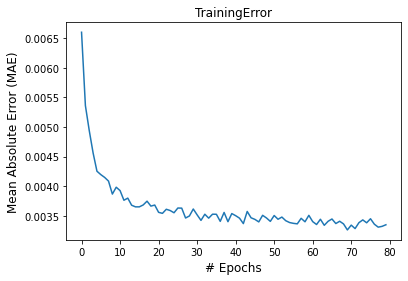

In [987]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [988]:
#作成したモデルを使用し予測。
train_pred = yen_model.predict(train_lstm_in)
# test_pred = yen_model.predict(X_test)

In [989]:
train_pred

array([[ 0.01194874],
       [ 0.01783292],
       [ 0.00220866],
       ...,
       [-0.01351756],
       [-0.0121981 ],
       [-0.02334447]], dtype=float32)

In [990]:
np.transpose(train_pred)

array([[ 0.01194874,  0.01783292,  0.00220866, ..., -0.01351756,
        -0.0121981 , -0.02334447]], dtype=float32)

In [991]:
len(train_pred)

2068

In [992]:
lstm_train_out

array([ 0.01554517,  0.02408164,  0.00835086, ..., -0.00716682,
       -0.01876104, -0.02665515])

In [993]:
len(lstm_train_out)

2068

In [994]:
# yen_model.score(train_pred, lstm_train_out) 

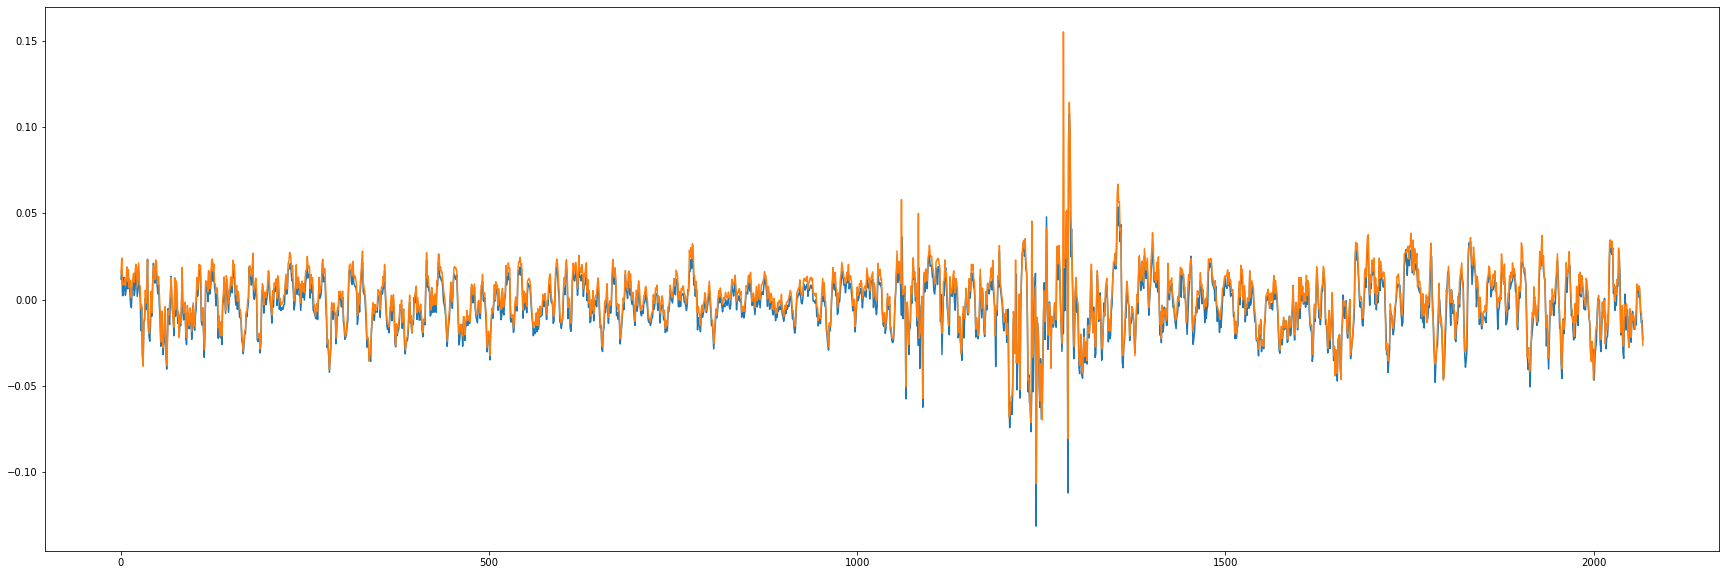

In [995]:
fig,ax = plt.subplots(figsize=(30,10))
# plt.plot(train_pred)

ax.plot(train_pred)
ax.plot(lstm_train_out)
plt.show()

In [996]:
# 配列には変化量が入っているので１００倍
np.transpose(train_pred+1)

array([[1.0119487 , 1.0178329 , 1.0022087 , ..., 0.98648244, 0.9878019 ,
        0.97665554]], dtype=float32)

In [997]:
#予測データ(変化量)を単価に直したもの
Pred_Train_Price_Array=(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])[0]
(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])[0]

array([112.64440935, 112.61233296, 112.07948263, ..., 122.89015268,
       122.59717611, 120.91851175])

In [998]:
#正解データ(変化量)を単価に直したもの
Actual_Train_Price_Array=(1+lstm_train_out)* df_train['Open'].values[:-window_len]
(1+lstm_train_out)* df_train['Open'].values[:-window_len]

array([113.04474801, 113.30369174, 112.76637495, ..., 123.68128955,
       121.78264081, 120.50861955])

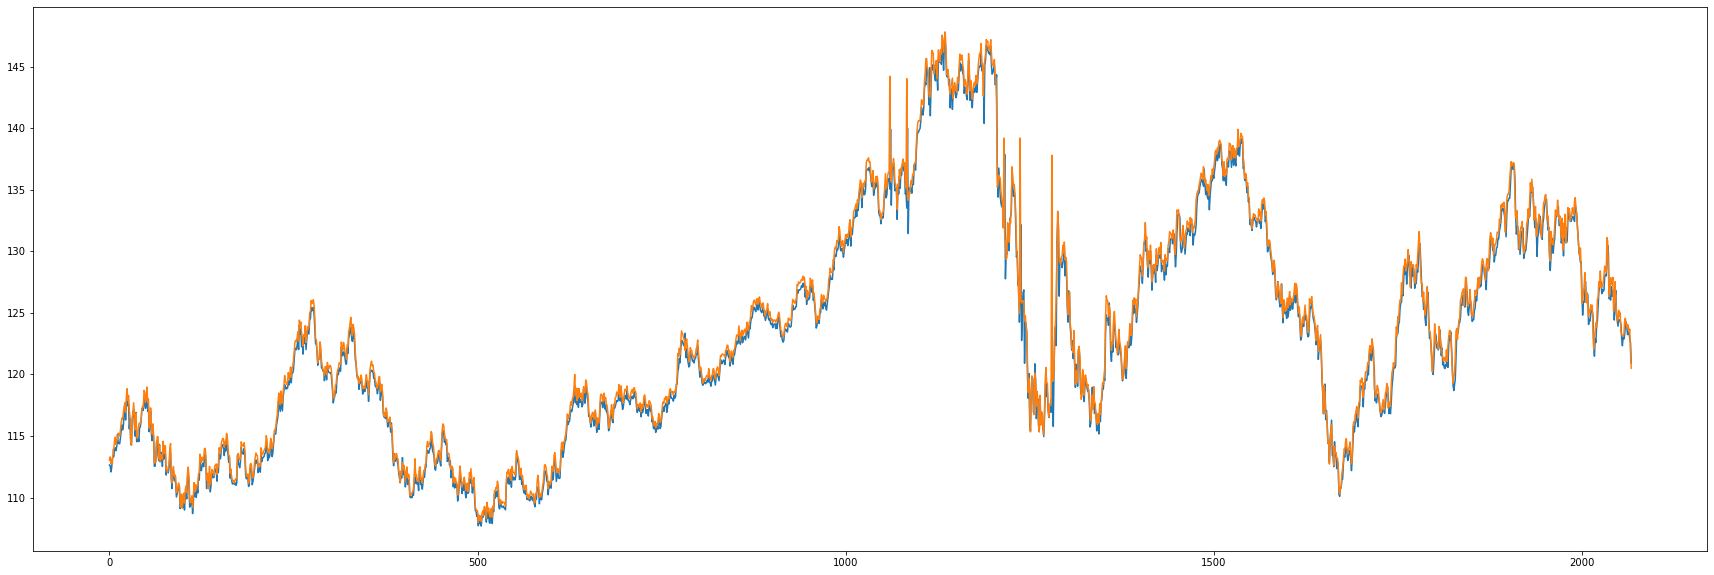

In [999]:
fig,ax = plt.subplots(figsize=(30,10))

# 予測データと正解データの併記
ax.plot(Pred_Train_Price_Array)
ax.plot(Actual_Train_Price_Array)
plt.show()

In [1000]:
# #元のdf_trainデータ
# fig,ax = plt.subplots(figsize=(30,10))
# # plt.plot(train_pred)

# # ax.plot(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])
# ax.plot(df_train['Open'])
# # ax.set_xlim(datetime.datetime(2003,12,1), datetime.datetime(2011,12,14)) # 範囲指定
# plt.show()

## テストデータへの転用

In [1001]:
#作成したモデルを使用し予測。
test_pred = yen_model.predict(test_lstm_in)

In [1002]:
test_pred

array([[ 0.00480704],
       [-0.01843592],
       [-0.01076294],
       ...,
       [-0.00835764],
       [-0.00716616],
       [ 0.00022222]], dtype=float32)

In [1003]:
len(test_pred)

1240

In [1004]:
np.transpose(test_pred)

array([[ 0.00480704, -0.01843592, -0.01076294, ..., -0.00835764,
        -0.00716616,  0.00022222]], dtype=float32)

In [1005]:
len(lstm_test_out)

1240

In [1006]:
# 予測データ(変化量)を単価に直したもの
Pred_Price_Array=(np.transpose(test_pred+1)* df_test['Open'].values[:-window_len])[0]
(np.transpose(test_pred+1)* df_test['Open'].values[:-window_len])[0]

array([120.71046831, 118.30542189, 119.28462397, ..., 102.58216711,
       102.17067636, 103.04104845])

In [1007]:
typeInfo(Pred_Price_Array)

Pred_Price_Array は ndarray型
Pred_Price_Array の行数, 列数・・・(1240,)



In [1008]:
# 正解データ(変化量)を単価に直したもの
Actual_Price_Array=(1+lstm_test_out)* df_test['Open'].values[:-window_len]
(1+lstm_test_out)* df_test['Open'].values[:-window_len]

array([119.56311047, 119.80778545, 119.88076121, ..., 102.68650234,
       103.42938185, 103.64146143])

In [1009]:
typeInfo(Actual_Price_Array)

Actual_Price_Array は ndarray型
Actual_Price_Array の行数, 列数・・・(1240,)



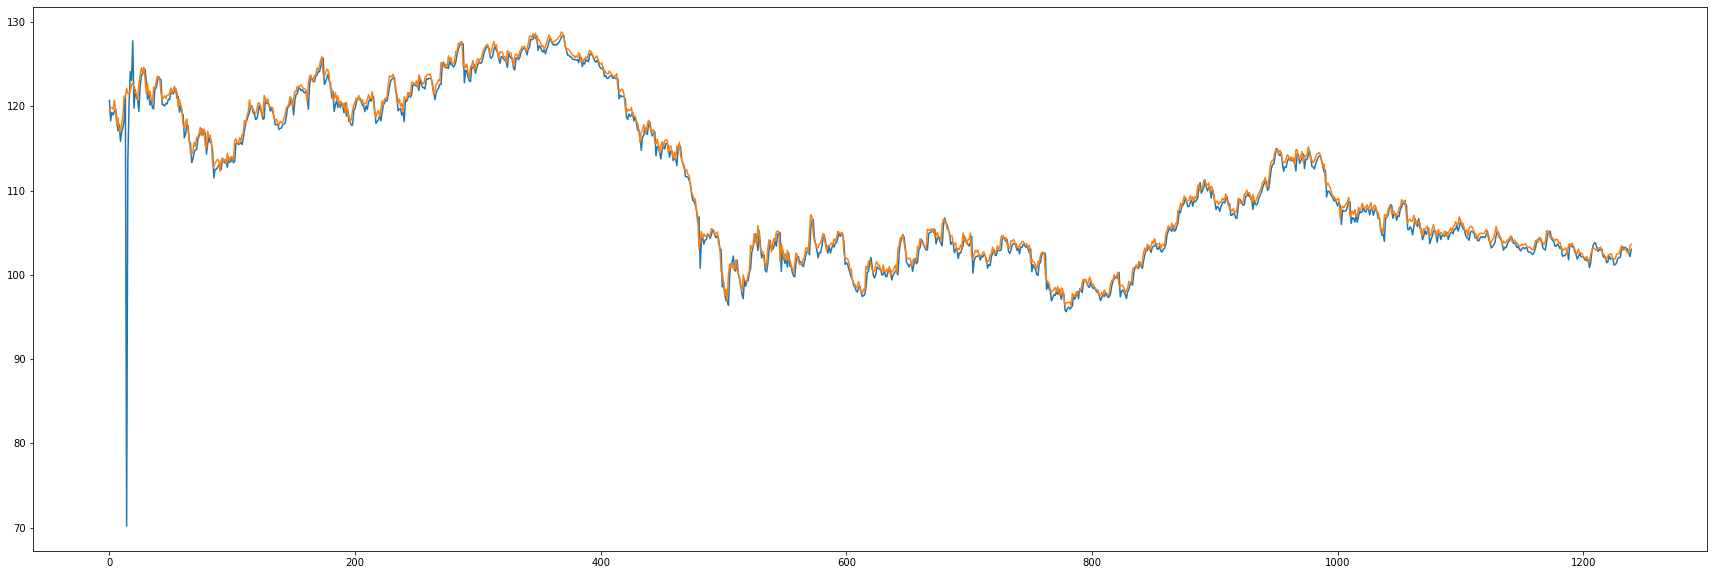

In [1010]:
fig,ax = plt.subplots(figsize=(30,10))
# fig,ax = plt.subplots()

# 正解データと予測データの併記
ax.plot(Pred_Price_Array)
ax.plot(Actual_Price_Array)
plt.show()

In [1011]:
# Actual_Price_Array[::12]

In [1012]:
len(Pred_Price_Array)

1240

In [1013]:
Pred_Price_Array_7=Pred_Price_Array[::6]
Pred_Price_Array_7

array([120.71046831, 118.5703368 , 118.39598383, 123.09613691,
       119.40731582, 123.10340116, 119.71927804, 123.16803619,
       120.87275132, 122.12282537, 119.00767674, 115.60995033,
       116.09828382, 116.74107469, 114.73145896, 113.2207636 ,
       112.76195554, 113.4671217 , 115.46552502, 119.26566577,
       118.52076958, 118.59027037, 119.77292639, 117.26759471,
       118.76041496, 118.98285529, 121.87196936, 119.67845597,
       123.61265847, 125.74037557, 122.70060549, 119.88664656,
       120.40422852, 117.80156259, 120.9876264 , 119.64700173,
       119.51068937, 119.27969632, 122.30389758, 121.44349252,
       118.19857646, 121.349963  , 121.90110532, 123.28296981,
       121.71212738, 122.60346272, 124.52076829, 125.27950414,
       127.43824307, 122.95502616, 125.02698568, 126.73766789,
       125.95875544, 125.13232496, 124.62777274, 124.32591728,
       126.70011466, 127.02419969, 128.36134722, 126.76092739,
       127.64065621, 127.59860863, 126.71748478, 125.60

In [1014]:
len(Pred_Price_Array_7)

207

In [1015]:
df_test_Close_array=df_test['Close'].values
df_test_Close_array

array([120.13923079, 120.52431077, 120.59187233, ..., 102.68535554,
       103.43631774, 103.6212492 ])

In [1016]:
df_test_Close_array6=df_test_Close_array[5::6]
df_test_Close_array6

array([120.62017828, 119.61567551, 119.0108633 , 121.82273448,
       120.78713596, 123.21832687, 120.4583922 , 123.26759487,
       121.35922045, 122.40306705, 119.66364235, 116.19142771,
       116.30831242, 117.29647338, 115.77551663, 113.56660515,
       113.23295444, 113.6782521 , 115.91478586, 119.35484618,
       119.1549623 , 118.94046783, 119.92739379, 118.02985877,
       119.00167793, 119.91185695, 122.44843155, 120.55258363,
       123.69617581, 125.9017241 , 123.51448625, 120.80449224,
       120.36435515, 118.54718387, 121.31147414, 120.3173697 ,
       120.56829691, 119.55693543, 122.52141833, 122.4289912 ,
       119.39642847, 121.27329916, 122.2106263 , 123.52438837,
       122.43547499, 123.01513493, 124.74713475, 125.39992481,
       127.69893676, 123.46831679, 125.35913646, 126.78527325,
       126.52513862, 125.76307237, 125.13020784, 124.76564884,
       126.72448218, 127.43679523, 128.69565457, 127.20721602,
       128.07731241, 128.02591622, 127.28598088, 126.06

In [1017]:
len(df_test_Close_array6)

207

In [1018]:
Dif_Array=Pred_Price_Array_7-df_test_Close_array6
Dif_Array

array([ 0.09029003, -1.0453387 , -0.61487947,  1.27340243, -1.37982014,
       -0.11492571, -0.73911417, -0.09955869, -0.48646913, -0.28024168,
       -0.65596561, -0.58147738, -0.2100286 , -0.55539869, -1.04405767,
       -0.34584155, -0.4709989 , -0.2111304 , -0.44926084, -0.08918041,
       -0.63419272, -0.35019746, -0.1544674 , -0.76226406, -0.24126297,
       -0.92900165, -0.57646219, -0.87412766, -0.08351734, -0.16134853,
       -0.81388076, -0.91784568,  0.03987337, -0.74562128, -0.32384774,
       -0.67036797, -1.05760754, -0.27723911, -0.21752075, -0.98549868,
       -1.197852  ,  0.07666384, -0.30952099, -0.24141856, -0.72334761,
       -0.41167221, -0.22636646, -0.12042067, -0.26069369, -0.51329063,
       -0.33215079, -0.04760536, -0.56638317, -0.63074741, -0.5024351 ,
       -0.43973157, -0.02436752, -0.41259554, -0.33430735, -0.44628863,
       -0.4366562 , -0.42730759, -0.5684961 , -0.46470771, -0.39532985,
       -0.44102062, -0.44444336, -0.50571525, -0.53556957, -0.59

In [1019]:
Df_Dif_Array = pd.Series(Dif_Array)
Df_Dif_Array

0      0.090290
1     -1.045339
2     -0.614879
3      1.273402
4     -1.379820
         ...   
202   -0.199545
203   -0.266798
204   -0.515921
205   -0.448615
206    0.180901
Length: 207, dtype: float64

In [1020]:
def p_judge(x):
    if x < 0:
        return 0
    else:
        return 1

In [1021]:
Df_sub=Df_Dif_Array.apply(p_judge)
Df_sub

0      1
1      0
2      0
3      1
4      0
      ..
202    0
203    0
204    0
205    0
206    1
Length: 207, dtype: int64

In [1022]:
Df_sub.describe()

count    207.000000
mean       0.053140
std        0.224857
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

In [1023]:
df_submit[1]=Df_sub
df_submit

,Date,1
0,2011-12-22,1
1,2012-01-05,0
2,2012-01-19,0
3,2012-02-02,1
4,2012-02-16,0
...,...,...
202,2019-10-23,0
203,2019-11-07,0
204,2019-11-21,0
205,2019-12-05,0


In [1024]:
# 指定の様式（インデックスはDate、カラム名は「y」のみ）をお守りください。
df_submit = df_submit.set_index("Date") #indexにDateを指定する。
df_submit = df_submit.rename(columns={1: 'y'}) #カラム名「1」を「y」に変更する。
df_submit.to_csv('y_submit.csv') #投稿するファイルを書き出す。
df_submit #投稿する中身を確認する。

,y
Date,
2011-12-22,1
2012-01-05,0
2012-01-19,0
2012-02-02,1
2012-02-16,0
...,...
2019-10-23,0
2019-11-07,0
2019-11-21,0
